In [1]:
from fastai.vision.all import *
import fastai
import timm
import torch
import pandas as pd
torch.cuda.set_device(0)
import albumentations as A

In [2]:
df = pd.read_csv('dfNew5.csv')

In [3]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='convnext_base_semisupervised_v6'),MixUp(),
    # ReduceLROnPlateau(patience=2)
]

In [4]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock),
             splitter=ColSplitter('Split'),
             get_x = ColReader(0),
             get_y=ColReader(1),
             item_tfms = [Resize(800)], # CropPad(200,200)
             batch_tfms=[*aug_transforms(size=800, min_scale=0.75,do_flip=True,flip_vert=True,
                  max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)])

In [5]:
dls = db.dataloaders(df,bs=16)

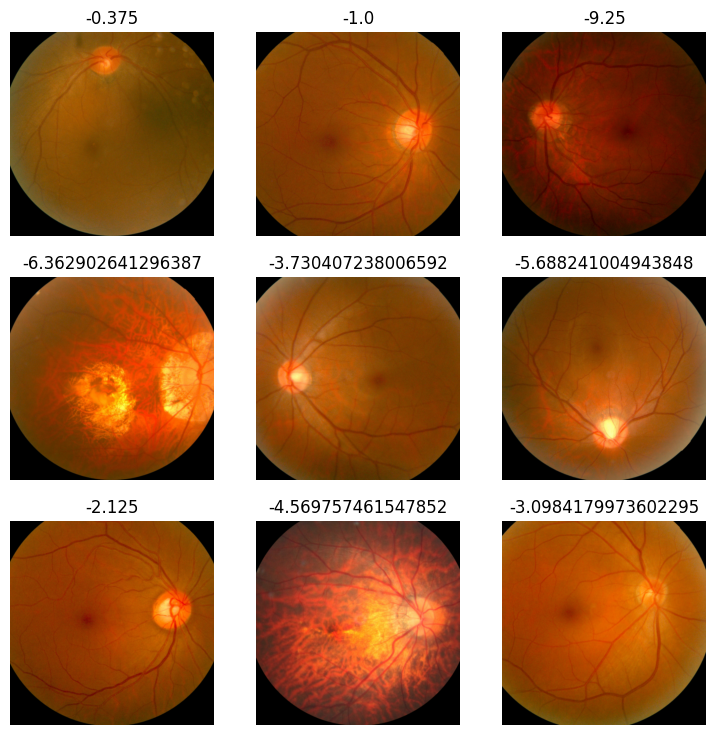

In [6]:
dls.show_batch()

In [7]:
learn = vision_learner(dls,convnext_base,pretrained=True,
            loss_func=MSELossFlat(), metrics=[mae,rmse,mse],
            cbs=callbacks).to_fp16()

/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
learn.load('convnext_base_semisupervised_v4')

/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/fastai/learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,1.726033,2.512721,1.216318,1.585157,2.512721,01:17
1,1.546261,2.025074,1.075692,1.423051,2.025074,01:13
2,1.524268,1.872526,1.020896,1.368403,1.872526,01:14
3,1.375111,2.763010,1.317516,1.662230,2.763010,01:15
4,1.403376,1.992095,1.064803,1.411416,1.992095,01:14
5,1.262243,2.052111,1.120428,1.432519,2.052111,01:14
6,1.359566,2.153622,1.126200,1.467523,2.153622,01:13
7,1.369628,1.573748,0.946428,1.254491,1.573748,01:13
8,1.329353,1.777054,1.008364,1.333062,1.777054,01:13
9,1.432849,2.147891,1.134859,1.465569,2.147891,01:13


Better model found at epoch 0 with valid_loss value: 2.512721300125122.


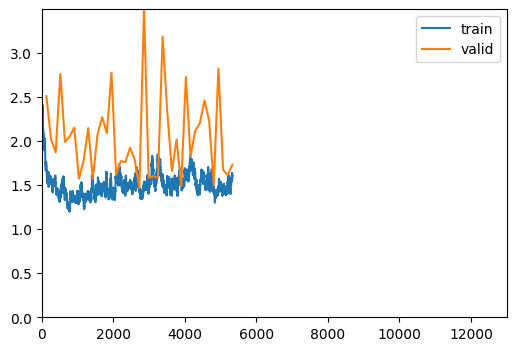

Better model found at epoch 1 with valid_loss value: 2.0250742435455322.
Better model found at epoch 2 with valid_loss value: 1.8725262880325317.
Better model found at epoch 7 with valid_loss value: 1.573748230934143.
Better model found at epoch 20 with valid_loss value: 1.474513053894043.


KeyboardInterrupt: 

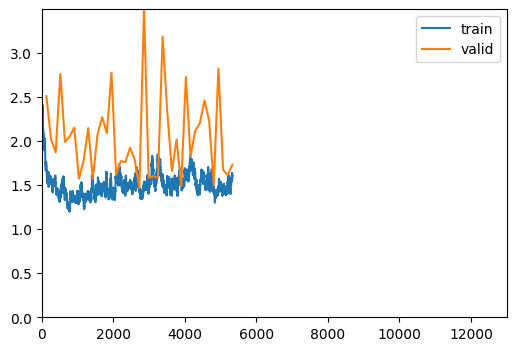

In [9]:
learn.freeze()
learn.fit_one_cycle(100,lr_max=3e-3)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
preds,y=learn.get_preds()

In [ ]:
print(mean_absolute_error(preds,y))

In [ ]:
print(mean_squared_error(preds,y))

In [ ]:
# learn1 = vision_learner(dls,convnext_base,pretrained=True)
# learn1.load('convnext_base_semisupervised')
# learn1.export('models/convnext_base_semisupervised.pkl')

In [10]:
learn1 = vision_learner(dls,convnext_base,pretrained=True)
learn1.load('convnext_base_semisupervised_v6')
learn1.export('models/convnext_base_semisupervised_v6.pkl')